In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import warnings

warnings.filterwarnings('ignore')
pd.set_option('display.max_columns', None)

In [2]:
df = pd.read_csv('../data/1_original_dataset.csv', index_col=0)
df

,Index,Address,FLAG,Avg min between sent tnx,Avg min between received tnx,Time Diff between first and last (Mins),Sent tnx,Received Tnx,Number of Created Contracts,Unique Received From Addresses,Unique Sent To Addresses,min value received,max value received,avg val received,min val sent,max val sent,avg val sent,min value sent to contract,max val sent to contract,avg value sent to contract,total transactions (including tnx to create contract,total Ether sent,total ether received,total ether sent contracts,total ether balance,Total ERC20 tnxs,ERC20 total Ether received,ERC20 total ether sent,ERC20 total Ether sent contract,ERC20 uniq sent addr,ERC20 uniq rec addr,ERC20 uniq sent addr.1,ERC20 uniq rec contract addr,ERC20 avg time between sent tnx,ERC20 avg time between rec tnx,ERC20 avg time between rec 2 tnx,ERC20 avg time between contract tnx,ERC20 min val rec,ERC20 max val rec,ERC20 avg val rec,ERC20 min val sent,ERC20 max val sent,ERC20 avg val sent,ERC20 min val sent contract,ERC20 max val sent contract,ERC20 avg val sent contract,ERC20 uniq sent token name,ERC20 uniq rec token name,ERC20 most sent token type,ERC20_most_rec_token_type
0,1,0x00009277775ac7d0d59eaad8fee3d10ac6c805e8,0,844.26,1093.71,704785.63,721,89,0,40,118,0.000000,45.806785,6.589513,0.000000,31.220000,1.200681,0.0,0.0,0.0,810,865.691093,586.466675,0.0,-279.224419,265.0,3.558854e+07,3.560317e+07,0.0,30.0,54.0,0.0,58.0,0.0,0.0,0.0,0.0,0.00,1.500000e+07,265586.147600,0.000000,1.683100e+07,271779.920000,0.0,0.0,0.0,39.0,57.0,Cofoundit,Numeraire
1,2,0x0002b44ddb1476db43c868bd494422ee4c136fed,0,12709.07,2958.44,1218216.73,94,8,0,5,14,0.000000,2.613269,0.385685,0.000000,1.800000,0.032844,0.0,0.0,0.0,102,3.087297,3.085478,0.0,-0.001819,8.0,4.034283e+02,2.260809e+00,0.0,1.0,5.0,0.0,7.0,0.0,0.0,0.0,0.0,0.00,3.650000e+02,57.632615,2.260809,2.260809e+00,2.260809,0.0,0.0,0.0,1.0,7.0,Livepeer Token,Livepeer Token
2,3,0x0002bda54cb772d040f779e88eb453cac0daa244,0,246194.54,2434.02,516729.30,2,10,0,10,2,0.113119,1.165453,0.358906,0.050000,3.538616,1.794308,0.0,0.0,0.0,12,3.588616,3.589057,0.0,0.000441,8.0,5.215121e+02,0.000000e+00,0.0,0.0,7.0,0.0,8.0,0.0,0.0,0.0,0.0,0.00,4.428198e+02,65.189009,0.000000,0.000000e+00,0.000000,0.0,0.0,0.0,0.0,8.0,None,XENON
3,4,0x00038e6ba2fd5c09aedb96697c8d7b8fa6632e5e,0,10219.60,15785.09,397555.90,25,9,0,7,13,0.000000,500.000000,99.488840,0.000000,450.000000,70.001834,0.0,0.0,0.0,34,1750.045862,895.399559,0.0,-854.646303,14.0,1.711105e+04,1.141223e+04,0.0,2.0,11.0,0.0,11.0,0.0,0.0,0.0,0.0,0.00,1.141223e+04,1555.550174,100.000000,9.029231e+03,3804.076893,0.0,0.0,0.0,1.0,11.0,Raiden,XENON
4,5,0x00062d1dd1afb6fb02540ddad9cdebfe568e0d89,0,36.61,10707.77,382472.42,4598,20,1,7,19,0.000000,12.802411,2.671095,0.000000,9.000000,0.022688,0.0,0.0,0.0,4619,104.318883,53.421897,0.0,-50.896986,42.0,1.628297e+05,1.235399e+05,0.0,4.0,23.0,0.0,27.0,0.0,0.0,0.0,0.0,0.00,9.000000e+04,4934.232147,0.000000,4.500000e+04,13726.659220,0.0,0.0,0.0,6.0,27.0,StatusNetwork,EOS
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9836,2175,0xff481ca14e6c16b79fc8ab299b4d2387ec8ecdd2,1,12635.10,631.39,58748.48,4,13,0,11,4,0.004082,12.000000,2.821060,0.465461,12.200000,9.166365,0.0,0.0,0.0,17,36.665461,36.673777,0.0,0.008316,2.0,1.337000e+00,0.000000e+00,0.0,0.0,2.0,0.0,2.0,0.0,0.0,0.0,0.0,0.00,1.337000e+00,0.668500,0.000000,0.000000e+00,0.000000,0.0,0.0,0.0,0.0,2.0,,GSENetwork
9837,2176,0xff718805bb9199ebf024ab6acd333e603ad77c85,1,0.00,0.00,0.00,0,0,0,0,0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0,0.000000,0.000000,0.0,0.000000,1.0,1.337000e+01,0.000000e+00,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,13.37,1.337000e+01,13.370000,0.000000,0.000000e+00,0.000000,0.0,0.0,0.0,0.0,1.0,,Blockwell say NOTSAFU
9838,2177,0xff8e6af02d41a576a0c82f7835535193e1a6bccc,1,2499.44,2189.29,261601.88,67,43,0,31,44,0.001078,21

In [3]:
df.columns

Index(['Index', 'Address', 'FLAG', 'Avg min between sent tnx',
       'Avg min between received tnx',
       'Time Diff between first and last (Mins)', 'Sent tnx', 'Received Tnx',
       'Number of Created Contracts', 'Unique Received From Addresses',
       'Unique Sent To Addresses', 'min value received', 'max value received ',
       'avg val received', 'min val sent', 'max val sent', 'avg val sent',
       'min value sent to contract', 'max val sent to contract',
       'avg value sent to contract',
       'total transactions (including tnx to create contract',
       'total Ether sent', 'total ether received',
       'total ether sent contracts', 'total ether balance',
       ' Total ERC20 tnxs', ' ERC20 total Ether received',
       ' ERC20 total ether sent', ' ERC20 total Ether sent contract',
       ' ERC20 uniq sent addr', ' ERC20 uniq rec addr',
       ' ERC20 uniq sent addr.1', ' ERC20 uniq rec contract addr',
       ' ERC20 avg time between sent tnx', ' ERC20 avg time betwe

In [4]:
len(df['Address'].unique())

# Conclusion: account-based table

9816

In [5]:
df['FLAG'].value_counts()

#Conclusion: imbalanced dataset

0    7662
1    2179
Name: FLAG, dtype: int64

In [6]:
print(df[' ERC20 most sent token type'].unique())
print(df[' ERC20_most_rec_token_type'].unique())

['Cofoundit' 'Livepeer Token' 'None' 'Raiden' 'StatusNetwork' '0'
 'TenXPay' nan 'blockwell.ai KYC Casper Token' 'EOS' 'ICO' 'bitqy'
 'OmiseGO' 'SONM' 'BAT' 'Melon' 'Friendz Coin' 'FunFair' 'MKR' 'Golem'
 'AION' 'Aragon' 'TokenCard' 'Crypto.com' 'CRYPTOPUNKS' 'Aigang' 'Bancor'
 'ZRX' 'PangeaCoinICO' 'VeChain' 'Decentraland' 'Mysterium' 'Dochain'
 'SwarmCity' 'BNB' 'Humaniq' 'DGD' 'Storm' 'Patientory' 'NapoleonX'
 'Nexium' 'Qtum' 'district0x' 'Bytom' 'Identity Hub Token' 'Celsius'
 'Reputation' 'Tronix' 'ViteToken' 'Poker Chips' 'MEX' 'Salt' 'Edgeless'
 'SAN' 'TheDAO' 'Telcoin' 'EduCoin' 'DICE' 'Trustcoin' 'Tokenomy'
 'Veritaseum' 'Time New Bank' 'NimiqNetwork' 'Kin' 'UG Token' 'SNGLS'
 'BlockchainPoland' 'Monetha' 'Propy' 'Republic' 'Civic' 'Storj' 'Loom'
 'DATAcoin' 'ChainLink Token' 'Ether Token' 'Guaranteed Entrance Token'
 'Individual Content &amp; Skill Token' 'OWN' 'Populous' 'Sether'
 'Soarcoin' 'AdBank' 'Stox' 'FinShi Capital Tokens' 'Dao.Casino'
 'iXledger' 'Aeternity' 'TAAS' 

In [7]:
df['has_sent_ERC20'] = np.where(df[' ERC20 most sent token type'].isin(["","None", "0", None,0, np.nan]), 0, 1)
df['has_sent_ERC20'].value_counts()

0    7096
1    2745
Name: has_sent_ERC20, dtype: int64

In [8]:
df['has_received_ERC20'] = np.where(df[' ERC20_most_rec_token_type'].isin(["","None", "0", None,0, np.nan]), 0, 1)
df['has_received_ERC20'].value_counts()

0    5270
1    4571
Name: has_received_ERC20, dtype: int64

In [9]:
# Discard unique identifiers and high cardinality columns
df = df.drop(['Index','Address',' ERC20 most sent token type',' ERC20_most_rec_token_type'],axis=1)


In [10]:
df.skew()

FLAG                                                     1.342100
Avg min between sent tnx                                 8.420000
Avg min between received tnx                             6.745298
Time Diff between first and last (Mins)                  1.809977
Sent tnx                                                10.484544
Received Tnx                                             8.821383
Number of Created Contracts                             51.720220
Unique Received From Addresses                          18.116107
Unique Sent To Addresses                                18.354325
min value received                                      23.295883
max value received                                      46.423682
avg val received                                        96.513680
min val sent                                            73.426748
max val sent                                            59.833713
avg val sent                                            25.531087
min value 

In [11]:
# Problematic columns - zeroes or NaNs throughout, may be attributed to imputation error

print(df[' ERC20 avg time between sent tnx'].unique())
print(df[' ERC20 min val sent contract'].unique())

# Eliminate problematic columns
df = df.drop([' ERC20 avg time between sent tnx', ' ERC20 avg time between rec tnx',
       ' ERC20 avg time between rec 2 tnx',
       ' ERC20 avg time between contract tnx',' ERC20 min val sent contract', ' ERC20 max val sent contract',
       ' ERC20 avg val sent contract'], axis=1)

[ 0. nan]
[ 0. nan]


In [12]:
from scipy.stats import pearsonr
import pandas as pd

def calculate_pvalues(df):
    dfcols = pd.DataFrame(columns=df.columns)
    pvalues = dfcols.transpose().join(dfcols, how='outer')
    for r in df.columns:
        for c in df.columns:
            tmp = df[df[r].notnull() & df[c].notnull()]
            pvalues[r][c] = round(pearsonr(tmp[r], tmp[c])[1], 4)
    return pvalues

In [13]:
calculate_pvalues(df)

,FLAG,Avg min between sent tnx,Avg min between received tnx,Time Diff between first and last (Mins),Sent tnx,Received Tnx,Number of Created Contracts,Unique Received From Addresses,Unique Sent To Addresses,min value received,max value received,avg val received,min val sent,max val sent,avg val sent,min value sent to contract,max val sent to contract,avg value sent to contract,total transactions (including tnx to create contract,total Ether sent,total ether received,total ether sent contracts,total ether balance,Total ERC20 tnxs,ERC20 total Ether received,ERC20 total ether sent,ERC20 total Ether sent contract,ERC20 uniq sent addr,ERC20 uniq rec addr,ERC20 uniq sent addr.1,ERC20 uniq rec contract addr,ERC20 min val rec,ERC20 max val rec,ERC20 avg val rec,ERC20 min val sent,ERC20 max val sent,ERC20 avg val sent,ERC20 uniq sent token name,ERC20 uniq rec token name,has_sent_ERC20,has_received_ERC20
FLAG,0.0,0.0032,0.0,0.0,0.0,0.0,0.1738,0.0015,0.0,0.0318,0.0561,0.2386,0.511,0.026,0.0,0.4743,0.4282,0.3783,0.0,0.137,0.0937,0.4282,0.7487,0.0147,0.671,0.0187,0.1996,0.051,0.0959,0.7724,0.0786,0.2893,0.6823,0.4544,0.016,0.0175,0.0174,0.38,0.0867,0.0,0.0
Avg min between sent tnx,0.0032,0.0,0.0,0.0,0.0014,0.0004,0.5395,0.1145,0.0793,0.1398,0.481,0.6638,0.9376,0.5708,0.7212,0.9833,0.9176,0.94,0.0,0.5229,0.4699,0.9176,0.8876,0.2427,0.8093,0.8416,0.6756,0.3684,0.9144,0.226,0.0,0.6574,0.8157,0.765,0.8728,0.848,0.852,0.96,0.0,0.0,0.0
Avg min between received tnx,0.0,0.0,0.0,0.0,0.0001,0.0,0.406,0.0033,0.0106,0.0,0.2509,0.3556,0.3849,0.2271,0.0001,0.6977,0.7487,0.696,0.0,0.349,0.2876,0.7487,0.8312,0.0508,0.7286,0.7129,0.5588,0.1607,0.1279,0.163,0.1564,0.4297,0.7365,0.5946,0.7213,0.7197,0.7235,0.0589,0.1554,0.0032,0.6133
Time Diff between first and last (Mins),0.0,0.0,0.0,0.0,0.0,0.0,0.7003,0.0002,0.0,0.0,0.8242,0.1649,0.1935,0.1591,0.0,0.8634,0.0003,0.0035,0.0,0.1972,0.1433,0.0003,0.7695,0.0,0.0,0.6341,0.4259,0.0001,0.0,0.0581,0.0,0.3169,0.0,0.0,0.5155,0.5518,0.5185,0.0,0.0,0.0,0.0
Sent tnx,0.0,0.0014,0.0001,0.0,0.0,0.0,0.0,0.0,0.0,0.0172,0.0,0.0,0.6307,0.0,0.0064,0.0034,0.1883,0.0385,0.0,0.0,0.0,0.1883,0.0,0.0,0.5259,0.9761,0.7834,0.0,0.0,0.4264,0.0,0.7135,0.6838,0.4012,0.8825,0.923,0.8931,0.0,0.0,0.0,0.0
Received Tnx,0.0,0.0004,0.0,0.0,0.0,0.0,0.7034,0.0,0.0,0.0229,0.0,0.8594,0.0,0.0,0.0,0.0406,0.4136,0.1721,0.0,0.0,0.0,0.4135,0.0,0.0,0.1173,0.9658,0.0,0.0,0.0,0.0,0.0,0.6717,0.1443,0.0694,0.857,0.9437,0.9306,0.0001,0.0,0.0,0.0
Number of Created Contracts,0.1738,0.5395,0.406,0.7003,0.0,0.7034,0.0,0.8264,0.0,0.8784,0.9406,0.9606,0.9278,0.0,0.9145,0.9793,0.9822,0.9786,0.0,0.0136,0.9405,0.9822,0.0002,0.0,0.8441,0.9119,0.9717,0.0,0.0,0.9182,0.0059,0.9404,0.9304,0.8456,0.993,0.9887,0.9947,0.5669,0.0043,0.0558,0.0208
Unique Received From Addresses,0.0015,0.1145,0.0033,0.0002,0.0,0.0,0.8264,0.0,0.0,0.1993,0.0,0.8955,0.0,0.0,0.0,0.0,0.021,0.0002,0.0,0.0042,0.0,0.021,0.0,0.0,0.7947,0.9955,0.0,0.0,0.0,0.0,0.0,0.8495,0.8791,0.7331,0.9211,0.9803,0.9587,0.0001,0.0,0.0,0.0
Unique Sent To Addresses,0.0,0.0793,0.0106,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.7535,0.0,0.028,0.0215,0.2785,0.0958,0.0,0.0,0.0,0.2785,0.0,0.0,0.5879,0.9997,0.8608,0.0,0.0,0.6119,0.0,0.8248,0.7327,0.6185,0.9268,0.9667,0.9374,0.0,0.0,0.0,0.0
min value received,0.0318,0.1398,0.0,0.0,0.0172,0.0229,0.8784,0.1993,0.0,0.0,0.0081,0.0,0.0,0.1352,0.0,0.8568,0.8416,0.8241,0.7911,0.8624,0.8525,0.8416,0.9816,0.4679,0.8698,0.8773,0.809,0.5644,0.6223,0.4845,0.7601,0.9128,0.874,0.7866,0.887,0.8846,0.8885,0.0062,0.7981,0.0001,0.0


In [14]:
# Statistically insignificant groups
# min value sent to contract - max val sent to contract - avg value sent to contract
# total ether sent contracts - total ether balance
# ERC20 total Ether received
# ERC20 uniq sent addr.1
# ERC20 min val rec - ERC20 max val rec - ERC20 avg val rec
df = df.drop(['min value sent to contract','max val sent to contract','avg value sent to contract',
             'total ether sent contracts', 'total ether balance',
             ' ERC20 total Ether received',
             ' ERC20 uniq sent addr.1',
             ' ERC20 min val rec', ' ERC20 max val rec', ' ERC20 avg val rec'], axis=1)

In [18]:
df['ERC20 uniq rec token name log'] = np.log(df[' ERC20 uniq rec token name']+1)
df['ERC20 uniq sent token name log'] = np.log(df[' ERC20 uniq sent token name']+1)

<Axes: xlabel='FLAG', ylabel='ERC20 uniq rec token name log'>

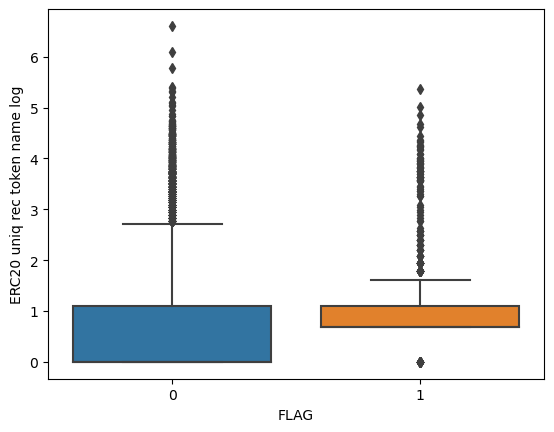

In [19]:

sns.boxplot(data=df,  x="FLAG",y='ERC20 uniq rec token name log')


<Axes: xlabel='FLAG', ylabel='ERC20 uniq sent token name log'>

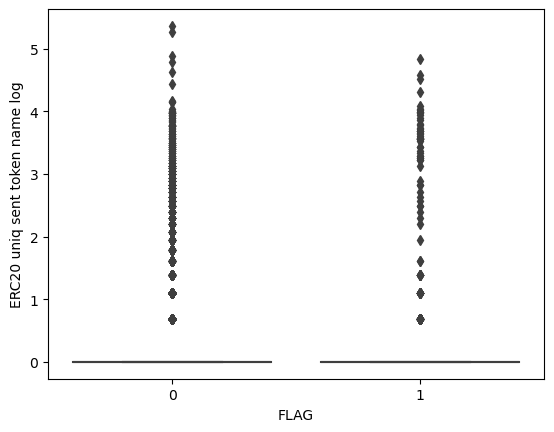

In [20]:
sns.boxplot(data=df,  x="FLAG",y='ERC20 uniq sent token name log')


In [21]:
df = df.drop(['ERC20 uniq rec token name log','ERC20 uniq sent token name log',' ERC20 uniq rec token name',' ERC20 uniq sent token name'],axis=1)

In [22]:
df

,FLAG,Avg min between sent tnx,Avg min between received tnx,Time Diff between first and last (Mins),Sent tnx,Received Tnx,Number of Created Contracts,Unique Received From Addresses,Unique Sent To Addresses,min value received,max value received,avg val received,min val sent,max val sent,avg val sent,total transactions (including tnx to create contract,total Ether sent,total ether received,Total ERC20 tnxs,ERC20 total ether sent,ERC20 total Ether sent contract,ERC20 uniq sent addr,ERC20 uniq rec addr,ERC20 uniq rec contract addr,ERC20 min val sent,ERC20 max val sent,ERC20 avg val sent,has_sent_ERC20,has_received_ERC20
0,0,844.26,1093.71,704785.63,721,89,0,40,118,0.000000,45.806785,6.589513,0.000000,31.220000,1.200681,810,865.691093,586.466675,265.0,3.560317e+07,0.0,30.0,54.0,58.0,0.000000,1.683100e+07,271779.920000,1,1
1,0,12709.07,2958.44,1218216.73,94,8,0,5,14,0.000000,2.613269,0.385685,0.000000,1.800000,0.032844,102,3.087297,3.085478,8.0,2.260809e+00,0.0,1.0,5.0,7.0,2.260809,2.260809e+00,2.260809,1,1
2,0,246194.54,2434.02,516729.30,2,10,0,10,2,0.113119,1.165453,0.358906,0.050000,3.538616,1.794308,12,3.588616,3.589057,8.0,0.000000e+00,0.0,0.0,7.0,8.0,0.000000,0.000000e+00,0.000000,0,1
3,0,10219.60,15785.09,397555.90,25,9,0,7,13,0.000000,500.000000,99.488840,0.000000,450.000000,70.001834,34,1750.045862,895.399559,14.0,1.141223e+04,0.0,2.0,11.0,11.0,100.000000,9.029231e+03,3804.076893,1,1
4,0,36.61,10707.77,382472.42,4598,20,1,7,19,0.000000,12.802411,2.671095,0.000000,9.000000,0.022688,4619,104.318883,53.421897,42.0,1.235399e+05,0.0,4.0,23.0,27.0,0.000000,4.500000e+04,13726.659220,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9836,1,12635.10,631.39,58748.48,4,13,0,11,4,0.004082,12.000000,2.821060,0.465461,12.200000,9.166365,17,36.665461,36.673777,2.0,0.000000e+00,0.0,0.0,2.0,2.0,0.000000,0.000000e+00,0.000000,1,1
9837,1,0.00,0.00,0.00,0,0,0,0,0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0,0.000000,0.000000,1.0,0.000000e+00,0.0,0.0,1.0,1.0,0.000000,0.000000e+00,0.000000,1,1
9838,1,2499.44,2189.29,261601.88,67,43,0,31,44,0.001078,21.310000,1.234192,0.004000,9.500000,0.922179,110,61.785995,53.070252,5.0,0.000000e+00,0.0,0.0,5.0,5.0,0.000000,0.000000e+00,0.000000,1,1
9839,1,0.00,0.00,0.00,0,1,0,1,0,0.500000,0.500000,0.500000,0.000000,0.000000,0.000000,1,0.000000,0.500000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0


In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9841 entries, 0 to 9840
Data columns (total 29 columns):
 #   Column                                                Non-Null Count  Dtype  
---  ------                                                --------------  -----  
 0   FLAG                                                  9841 non-null   int64  
 1   Avg min between sent tnx                              9841 non-null   float64
 2   Avg min between received tnx                          9841 non-null   float64
 3   Time Diff between first and last (Mins)               9841 non-null   float64
 4   Sent tnx                                              9841 non-null   int64  
 5   Received Tnx                                          9841 non-null   int64  
 6   Number of Created Contracts                           9841 non-null   int64  
 7   Unique Received From Addresses                        9841 non-null   int64  
 8   Unique Sent To Addresses                              9841

In [24]:
print(df[df[' ERC20 total ether sent'].isna()]['FLAG'].value_counts())
print(df[df[' ERC20 total Ether sent contract'].isna()]['FLAG'].value_counts())
print(df[df[' ERC20 uniq sent addr'].isna()]['FLAG'].value_counts())
print(df[df[' ERC20 uniq rec addr'].isna()]['FLAG'].value_counts())

1    829
Name: FLAG, dtype: int64
1    829
Name: FLAG, dtype: int64
1    829
Name: FLAG, dtype: int64
1    829
Name: FLAG, dtype: int64


In [25]:
print(df[df['FLAG']==0][' ERC20 total ether sent'].value_counts())

0.000000e+00    6255
1.000000e+02      84
2.500000e+03       6
2.000000e+02       4
1.000000e+01       3
                ... 
3.071161e+08       1
9.222235e+04       1
1.100000e-04       1
1.210000e-09       1
3.046000e+03       1
Name:  ERC20 total ether sent, Length: 1295, dtype: int64


In [27]:
# Zero Imputation
for e in [' Total ERC20 tnxs',
       ' ERC20 total ether sent', ' ERC20 total Ether sent contract',
       ' ERC20 uniq sent addr', ' ERC20 uniq rec addr',
       ' ERC20 uniq rec contract addr', ' ERC20 min val sent',
       ' ERC20 max val sent', ' ERC20 avg val sent']:
    df[e] = df[e].fillna(0)

In [28]:
df.skew()

FLAG                                                     1.342100
Avg min between sent tnx                                 8.420000
Avg min between received tnx                             6.745298
Time Diff between first and last (Mins)                  1.809977
Sent tnx                                                10.484544
Received Tnx                                             8.821383
Number of Created Contracts                             51.720220
Unique Received From Addresses                          18.116107
Unique Sent To Addresses                                18.354325
min value received                                      23.295883
max value received                                      46.423682
avg val received                                        96.513680
min val sent                                            73.426748
max val sent                                            59.833713
avg val sent                                            25.531087
total tran

In [29]:
print(df['Number of Created Contracts'].value_counts())
df['has_created_contracts'] = np.where(df['Number of Created Contracts']==0,0,1)
print(df['has_created_contracts'].value_counts())


0       8485
1       1320
2          8
3          7
4          4
5          3
19         1
3521       1
9995       1
2550       1
2096       1
6          1
1180       1
16         1
41         1
3900       1
6453       1
2404       1
3128       1
7          1
Name: Number of Created Contracts, dtype: int64
0    8485
1    1356
Name: has_created_contracts, dtype: int64


In [31]:
from scipy.stats import ttest_ind

group1 = df[df['FLAG'] == 0]['has_created_contracts']
group2 = df[df['FLAG'] == 1]['has_created_contracts']
t_stat, p = ttest_ind(group1, group2)

print(f"T-statistic: {t_stat}, p-value: {p}")

T-statistic: 8.144140116675114, p-value: 4.2837717843120537e-16


In [52]:
df['total_volume'] = df['total Ether sent'] + df['total ether received']

In [41]:
df['sent_to_total_transactions_ratio'] = np.where(df['total transactions (including tnx to create contract']==0,0,df['Sent tnx']/df['total transactions (including tnx to create contract'])
df['received_to_total_transactions_ratio'] = np.where(df['total transactions (including tnx to create contract']==0,0,df['Received Tnx']/df['total transactions (including tnx to create contract']) 

In [46]:
group1 = df[df['FLAG'] == 0]['sent_to_total_transactions_ratio']
group2 = df[df['FLAG'] == 1]['sent_to_total_transactions_ratio']
t_stat, p = ttest_ind(group1, group2)

print(f"T-statistic: {t_stat}, p-value: {p}")

T-statistic: 41.868107592884975, p-value: 0.0


In [58]:
df['total_ether_received_over_total_ether_volume'] = np.where(df['total_volume']==0,0,df['total ether received']/df['total_volume'])
df['total_ether_sent_over_total_ether_volume'] = np.where(df['total_volume']==0,0,df['total Ether sent']/df['total_volume'])

In [59]:
group1 = df[df['FLAG'] == 0]['total_ether_sent_over_total_ether_volume']
group2 = df[df['FLAG'] == 1]['total_ether_sent_over_total_ether_volume']
t_stat, p = ttest_ind(group1, group2)

print(f"T-statistic: {t_stat}, p-value: {p}")

T-statistic: 22.16171926142904, p-value: 3.107524672875666e-106


In [60]:
group1 = df[df['FLAG'] == 0]['total_ether_received_over_total_ether_volume']
group2 = df[df['FLAG'] == 1]['total_ether_received_over_total_ether_volume']
t_stat, p = ttest_ind(group1, group2)

print(f"T-statistic: {t_stat}, p-value: {p}")

T-statistic: 33.86113300816369, p-value: 7.763284905916398e-238


In [64]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9841 entries, 0 to 9840
Data columns (total 35 columns):
 #   Column                                                Non-Null Count  Dtype  
---  ------                                                --------------  -----  
 0   FLAG                                                  9841 non-null   int64  
 1   Avg min between sent tnx                              9841 non-null   float64
 2   Avg min between received tnx                          9841 non-null   float64
 3   Time Diff between first and last (Mins)               9841 non-null   float64
 4   Sent tnx                                              9841 non-null   int64  
 5   Received Tnx                                          9841 non-null   int64  
 6   Number of Created Contracts                           9841 non-null   int64  
 7   Unique Received From Addresses                        9841 non-null   int64  
 8   Unique Sent To Addresses                              9841

In [65]:
# Clean up columns
print(df.columns)
df.columns = ['is_fraud', 'avg_time_between_sent_txns', 'avg_time_between_received_txns','first_and_last_txns_time_diff',
             'num_sent_txns', 'num_received_txns','num_create_contracts_txns','num_unique_senders_to_acc','num_unique_recipients_from_acc','min_value_received','max_value_received','avg_value_received','min_value_sent','max_value_sent', 'avg_value_sent',
             'total_transactions','total_ether_sent','total_ether_received','total_ERC20_txns',
              'total_ERC20_sent_in_ether','total_ERC20_sent_contract_in_ether','ERC20_num_unique_recipients_from_acc','ERC20_num_unique_senders_to_acc',
              'ERC20_num_unique_senders_contract_to_acc',
              'ERC20_min_value_sent',
              'ERC20_max_value_sent',
              'ERC20_avg_value_sent',
              'has_sent_ERC20',
              'has_received_ERC20',
              'has_created_contracts',
              'total_ether_volume',
              'num_sent_to_total_txns_ratio',
              'num_received_to_total_txns_ratio',
              'total_value_sent_ratio',
              'total_value_received_ratio'
             ]

Index(['FLAG', 'Avg min between sent tnx', 'Avg min between received tnx',
       'Time Diff between first and last (Mins)', 'Sent tnx', 'Received Tnx',
       'Number of Created Contracts', 'Unique Received From Addresses',
       'Unique Sent To Addresses', 'min value received', 'max value received ',
       'avg val received', 'min val sent', 'max val sent', 'avg val sent',
       'total transactions (including tnx to create contract',
       'total Ether sent', 'total ether received', ' Total ERC20 tnxs',
       ' ERC20 total ether sent', ' ERC20 total Ether sent contract',
       ' ERC20 uniq sent addr', ' ERC20 uniq rec addr',
       ' ERC20 uniq rec contract addr', ' ERC20 min val sent',
       ' ERC20 max val sent', ' ERC20 avg val sent', 'has_sent_ERC20',
       'has_received_ERC20', 'has_created_contracts', 'total_volume',
       'sent_to_total_transactions_ratio',
       'received_to_total_transactions_ratio',
       'total_ether_sent_over_total_ether_volume',
       'total_

In [66]:
df

,is_fraud,avg_time_between_sent_txns,avg_time_between_received_txns,first_and_last_txns_time_diff,num_sent_txns,num_received_txns,num_create_contracts_txns,num_unique_senders_to_acc,num_unique_recipients_from_acc,min_value_received,max_value_received,avg_value_received,min_value_sent,max_value_sent,avg_value_sent,total_transactions,total_ether_sent,total_ether_received,total_ERC20_txns,total_ERC20_sent_in_ether,total_ERC20_sent_contract_in_ether,ERC20_num_unique_recipients_from_acc,ERC20_num_unique_senders_to_acc,ERC20_num_unique_senders_contract_to_acc,ERC20_min_value_sent,ERC20_max_value_sent,ERC20_avg_value_sent,has_sent_ERC20,has_received_ERC20,has_created_contracts,total_ether_volume,num_sent_to_total_txns_ratio,num_received_to_total_txns_ratio,total_value_sent_ratio,total_value_received_ratio
0,0,844.26,1093.71,704785.63,721,89,0,40,118,0.000000,45.806785,6.589513,0.000000,31.220000,1.200681,810,865.691093,586.466675,265.0,3.560317e+07,0.0,30.0,54.0,58.0,0.000000,1.683100e+07,271779.920000,1,1,0,1452.157768,0.890123,0.109877,0.596141,0.403859
1,0,12709.07,2958.44,1218216.73,94,8,0,5,14,0.000000,2.613269,0.385685,0.000000,1.800000,0.032844,102,3.087297,3.085478,8.0,2.260809e+00,0.0,1.0,5.0,7.0,2.260809,2.260809e+00,2.260809,1,1,0,6.172775,0.921569,0.078431,0.500147,0.499853
2,0,246194.54,2434.02,516729.30,2,10,0,10,2,0.113119,1.165453,0.358906,0.050000,3.538616,1.794308,12,3.588616,3.589057,8.0,0.000000e+00,0.0,0.0,7.0,8.0,0.000000,0.000000e+00,0.000000,0,1,0,7.177672,0.166667,0.833333,0.499969,0.500031
3,0,10219.60,15785.09,397555.90,25,9,0,7,13,0.000000,500.000000,99.488840,0.000000,450.000000,70.001834,34,1750.045862,895.399559,14.0,1.141223e+04,0.0,2.0,11.0,11.0,100.000000,9.029231e+03,3804.076893,1,1,0,2645.445421,0.735294,0.264706,0.661532,0.338468
4,0,36.61,10707.77,382472.42,4598,20,1,7,19,0.000000,12.802411,2.671095,0.000000,9.000000,0.022688,4619,104.318883,53.421897,42.0,1.235399e+05,0.0,4.0,23.0,27.0,0.000000,4.500000e+04,13726.659220,1,1,1,157.740779,0.995454,0.004330,0.661331,0.338669
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9836,1,12635.10,631.39,58748.48,4,13,0,11,4,0.004082,12.000000,2.821060,0.465461,12.200000,9.166365,17,36.665461,36.673777,2.0,0.000000e+00,0.0,0.0,2.0,2.0,0.000000,0.000000e+00,0.000000,1,1,0,73.339239,0.235294,0.764706,0.499943,0.500057
9837,1,0.00,0.00,0.00,0,0,0,0,0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0,0.000000,0.000000,1.0,0.000000e+00,0.0,0.0,1.0,1.0,0.000000,0.000000e+00,0.000000,1,1,0,0.000000,0.000000,0.000000,0.000000,0.000000
9838,1,2499.44,2189.29,261601.88,67,43,0,31,44,0.001078,21.310000,1.234192,0.004000,9.500000,0.922179,110,61.785995,53.070252,5.0,0.000000e+00,0.0,0.0,5.0,5.0,0.000000,0.000000e+00,0.000000,1,1,0,114.856246,0.609091,0.390909,0.537942,0.462058
9839,1,0.00,0.00,0.00,0,1,0,1,0,0.500000,0.500000,0.500000,0.000000,0.000000,0.000000,1,0.000000,0.500000,0.0,0.000000e+00,0.0,0.0,0.0,0.0,0.000000,0.000000e+00,0.000000,0,0,0,0.500000,0.000000,1.000000,0.000000,1.000000


In [67]:
df.to_csv('../data/2_cleaned_dataset.csv')  